# The DoWhy package provides several utilities for synthesizing data.
### Knowing how data is generated is a good starting point when learning a new methodology or algorithm.

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import dowhy.datasets 

# Define auxiliary functions

In [13]:
def plot_gml(gml_graph):
    G = nx.parse_gml(gml_graph)
    pos=nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color="darkorange")
    return(plt.show())

In [14]:
def describe_synthetic_data(synthetic_data):
 if (synthetic_data['gml_graph'] != None) :
    plot_gml(synthetic_data["gml_graph"])                                               
 synthetic_data_df=synthetic_data["df"]
 #print(synthetic_data_df.head())
 print('------- Variables --------')
 print('Treatment vars:'      , synthetic_data['treatment_name'])
 print('Outcome vars:'        , synthetic_data['outcome_name'])
 print('Common causes vars:'  , synthetic_data['common_causes_names'])
 print('Instrument vars:'     , synthetic_data['instrument_names'])
 print('Effect Modifier vars:', synthetic_data['effect_modifier_names'])
 print('Frontdoor vars:'      , synthetic_data['frontdoor_variables_names'])
 print('Treatment vars:', synthetic_data['outcome_name'])
 print('-------- Corr -------')
 print(synthetic_data_df.corr())
 print('------- Head --------')
 return(synthetic_data_df)

# linear_dataset 

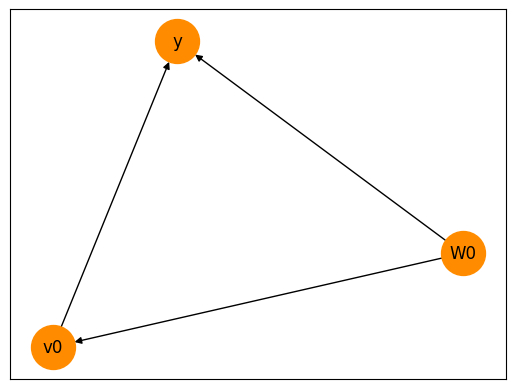

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: ['W0']
Instrument vars: []
Effect Modifier vars: []
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          W0        v0         y
W0  1.000000  0.771173  0.958701
v0  0.771173  1.000000  0.920392
y   0.958701  0.920392  1.000000
------- Head --------


,W0,v0,y
0,0.186517,True,108.755759
1,-1.406497,False,-65.973194
2,-1.956259,False,-91.761050
3,-3.013050,False,-141.343388
4,-0.747063,False,-35.054802


In [15]:
# create a dataset with 10 observations one binary treatment and a continous outcome affected by one common cause
synthetic_data = dowhy.datasets.linear_dataset(beta = 100,
                                               num_common_causes = 1,
                                               num_samples =10
                                               )
describe_synthetic_data(synthetic_data).head()

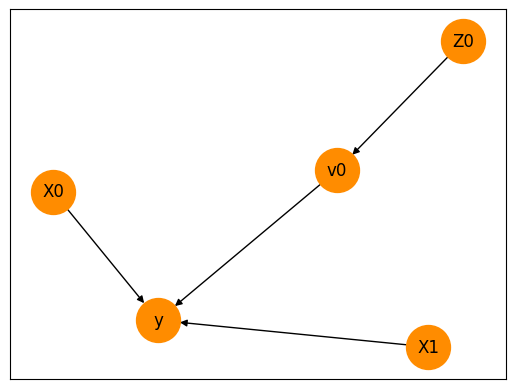

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: []
Instrument vars: ['Z0']
Effect Modifier vars: ['X0', 'X1']
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          X0        X1        Z0        v0         y
X0  1.000000 -0.072307 -0.268671 -0.254267 -0.131293
X1 -0.072307  1.000000  0.232409  0.230088  0.581926
Z0 -0.268671  0.232409  1.000000  0.999602  0.898047
v0 -0.254267  0.230088  0.999602  1.000000  0.900199
y  -0.131293  0.581926  0.898047  0.900199  1.000000
------- Head --------


,X0,X1,Z0,v0,y
0,-2.153149,0.862127,0.0,-0.423974,-39.267442
1,-1.816243,0.045405,1.0,103.224370,8314.595817
2,0.927385,0.897167,1.0,106.247913,13574.929241
3,-1.940696,3.000113,1.0,102.455652,13976.209207
4,-1.674801,0.113900,1.0,103.056785,8601.065682


In [16]:
# Two continuos treatments, no common cause, an instrumental variable and two effect modifiers - linearly added appropriately
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   0,
                              num_samples                   =  20,
                              num_instruments               =   1,
                              num_effect_modifiers          =   2, 
                              num_treatments                =   1,
                              num_frontdoor_variables       =   0,
                              treatment_is_binary           = False,
                              treatment_is_category         = False,
                              outcome_is_binary             = False,
                              stochastic_discretization     = True,
                              num_discrete_common_causes    =   0,
                              num_discrete_instruments      =   0,
                              num_discrete_effect_modifiers =   0,
                              stddev_treatment_noise        =   1,
                              stddev_outcome_noise          =  0.01,
                              one_hot_encode                = False
                                               )
describe_synthetic_data(synthetic_data).head()

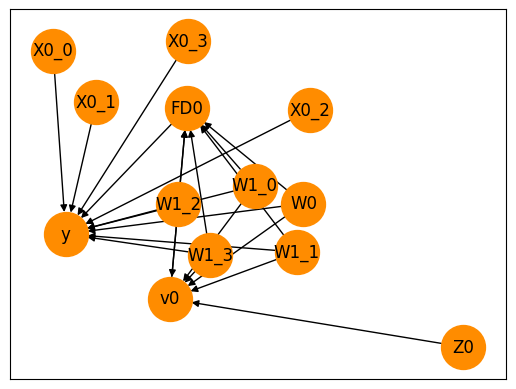

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: ['W0', 'W1_0', 'W1_1', 'W1_2', 'W1_3']
Instrument vars: ['Z0']
Effect Modifier vars: ['X0_0', 'X0_1', 'X0_2', 'X0_3']
Frontdoor vars: ['FD0']
Treatment vars: y
-------- Corr -------
           FD0      X0_0      X0_1      X0_2      X0_3  Z0        W0  \
FD0   1.000000 -0.115591  0.006791 -0.182240  0.291040 NaN  0.813151   
X0_0 -0.115591  1.000000 -0.333333 -0.333333 -0.333333 NaN -0.050511   
X0_1  0.006791 -0.333333  1.000000 -0.333333 -0.333333 NaN -0.032420   
X0_2 -0.182240 -0.333333 -0.333333  1.000000 -0.333333 NaN -0.203086   
X0_3  0.291040 -0.333333 -0.333333 -0.333333  1.000000 NaN  0.286016   
Z0         NaN       NaN       NaN       NaN       NaN NaN       NaN   
W0    0.813151 -0.050511 -0.032420 -0.203086  0.286016 NaN  1.000000   
W1_0 -0.581346  0.200000  0.200000 -0.066667 -0.333333 NaN -0.234383   
W1_1 -0.140909 -0.333333 -0.066667  0.200000  0.200000 NaN -0.076867   
W1_2  0.4079

,FD0,X0_0,X0_1,X0_2,X0_3,Z0,W0,W1_0,W1_1,W1_2,W1_3,v0,y
0,2078.990341,0.0,0.0,1.0,0.0,0.0,1.980275,0.0,0.0,0.0,1.0,63.164575,80994.303049
1,730.061492,0.0,1.0,0.0,0.0,0.0,0.830558,1.0,0.0,0.0,0.0,22.143051,28486.449624
2,1706.315557,1.0,0.0,0.0,0.0,0.0,0.164388,0.0,0.0,1.0,0.0,51.935356,64616.542869
3,2093.275236,0.0,0.0,0.0,1.0,0.0,0.724998,0.0,0.0,1.0,0.0,63.643347,80581.265825
4,2301.995438,0.0,0.0,0.0,1.0,0.0,2.282233,0.0,0.0,0.0,1.0,69.913799,88627.751361


In [17]:
# Hot Encoding
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   2,
                              num_samples                   =  20,
                              num_instruments               =   1,
                              num_effect_modifiers          =   1, 
                              num_treatments                =   1,
                              num_frontdoor_variables       =   1,
                              treatment_is_binary           = False,
                              treatment_is_category         = False,
                              outcome_is_binary             = False,
                              stochastic_discretization     = True,
                              num_discrete_common_causes    =   1, #of the total num_common_causes
                              num_discrete_instruments      =   1,
                              num_discrete_effect_modifiers =   1,
                              stddev_treatment_noise        =   1,
                              stddev_outcome_noise          =  0.01,
                              one_hot_encode                = True
                                               )
describe_synthetic_data(synthetic_data).head()

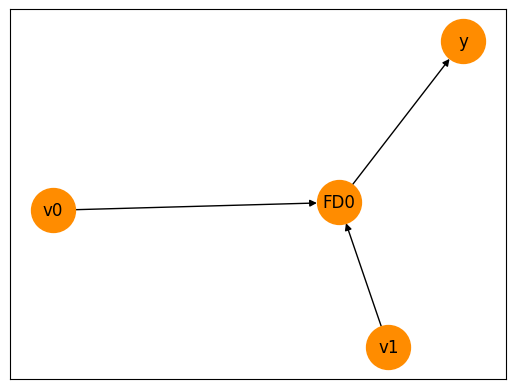

------- Variables --------
Treatment vars: ['v0', 'v1']
Outcome vars: y
Common causes vars: []
Instrument vars: []
Effect Modifier vars: []
Frontdoor vars: ['FD0']
Treatment vars: y
-------- Corr -------
          FD0        v0        v1         y
FD0  1.000000  0.708341  0.579943  1.000000
v0   0.708341  1.000000 -0.162779  0.708340
v1   0.579943 -0.162779  1.000000  0.579945
y    1.000000  0.708340  0.579945  1.000000
------- Head --------


,FD0,v0,v1,y
0,13.139952,1.296339,-0.330892,457.208232
1,21.030243,1.184464,0.777137,731.770523
2,14.916183,0.755697,0.731321,519.005963
3,-6.040079,-0.574463,0.133899,-210.177593
4,34.470549,1.429988,2.081779,1199.436987


In [18]:
#Front Door
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   0,
                              num_samples                   =  20,
                              num_instruments               =   0,
                              num_effect_modifiers          =   0, 
                              num_treatments                =   2,
                              num_frontdoor_variables       =   1,
                              treatment_is_binary           = False,
                              treatment_is_category         = False,
                              outcome_is_binary             = False,
                              stochastic_discretization     = True,
                              num_discrete_common_causes    =   0,
                              num_discrete_instruments      =   0,
                              num_discrete_effect_modifiers =   0,
                              stddev_treatment_noise        =   1,
                              stddev_outcome_noise          =  0.01,
                              one_hot_encode                = False
                                               )
describe_synthetic_data(synthetic_data).head()